# Import Packages

In [1]:
# arcpy
import arcpy
username = "na"
password = "na"
arcpy.SignInToPortal(arcpy.GetActivePortalURL(), username, password)

from arcpy import env
from arcpy.sa import *
from arcpy.ia import *
# Allow Overwrite
arcpy.env.overwriteOutput = 1

# arcgis
import arcgis
from arcgis.gis import GIS
gis = GIS("home")
from arcgis.features import SpatialDataFrame
spatial = SpatialDataFrame
from arcgis.features import GeoAccessor, GeoSeriesAccessor

# other
import pandas as pd
import os
from os import listdir
from os.path import isfile, join
from os.path import basename
from zipfile import ZipFile

In [2]:
# Set Data Directories
data_dir = "G:/Work/SDSN/Data/Mapping School Locations SAMPLE"

In [3]:
# Set Directory for School Aged Population Folder
arcpy.env.workspace = data_dir
arcpy.env.workspace

'G:/Work/SDSN/Data/Mapping School Locations SAMPLE'

# School Locations

In [4]:
# Item Added From Toolbar
# Title: OpenStreetMap Buildings for Africa | Type: Feature Service | Owner: smoore2_osm
item = gis.content.get("bb86721588ea49b6b44b10b7d5d2b0b1")
feature_layer = item.layers[0]
feature_layer

<FeatureLayer url:"https://services-eu1.arcgis.com/zci5bUiJ8olAal7N/arcgis/rest/services/OSM_AF_Buildings/FeatureServer/0">

In [5]:
# query for only buildings listed as schools
query_statement = "building='school'"
schools = feature_layer.query(where=query_statement)
schools

<FeatureSet> 41594 features

In [6]:
# Convert to Spatial Data Frame for conversion to ArcPy Layer Object
schools_sdf = schools.sdf
schools_sdf

,objectid,osm_id2,addr_city,addr_conscriptionnumber,addr_country,addr_district,addr_full,addr_housename,addr_housenumber,addr_interpolation,...,name_en,ref,ref_bag,roof_shape,shop,source_transform,source_date,start_date,wall,SHAPE
0,73434,437262207,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"{""rings"": [[[3851465.7951, 1704.03429999948], ..."
1,157513,433100600,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"{""rings"": [[[750633.782900002, 29397.254999999..."
2,157515,917135914,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"{""rings"": [[[750665.542399999, 29406.093899998..."
3,158093,669396653,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"{""rings"": [[[743584.197900001, 33088.297400001..."
4,159286,412965362,None,None,None,None,None,None,None,None,...,None,None,None,hipped,None,None,None,None,None,"{""rings"": [[[741987.085999999, 36632.106199998..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41589,59991108,357492526,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"{""rings"": [[[3058982.64070322, -3423174.204682..."
41590,59998733,1054354032,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"{""rings"": [[[-238550.711301811, 1377327.468537..."
41591,59998734,1054354031,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"{""rings"": [[[-238614.452842239, 1377256.561617..."
41592,59998736,1054354030,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"{""rings"": [[[-238577.283264263, 1377245.214703..."


In [7]:
# Save as shp file
columns = ['objectid', 'osm_id2', 'SHAPE']
output_schools_shp = data_dir + "/temp/school_locations.shp"
schools_sdf[columns].spatial.to_featureclass(output_schools_shp, overwrite = True)

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


'G:\\Work\\SDSN\\Data\\Mapping School Locations SAMPLE\\temp\\school_locations.shp'

In [8]:
# Import shp as ArcPy Layer object
schools_loc = arcpy.management.FeatureToPoint("temp/school_locations.shp")
schools_loc

<Result 'G:/Work/SDSN/Data/Mapping School Locations SAMPLE\\school_locations_FeatureToPo1.shp'>

# GADM

In [9]:
gadm_TZA = arcpy.management.SelectLayerByAttribute(
    "Masterfiles/gadm404", 
    "NEW_SELECTION", 
    """GID_0 IN ('TZA')""", 
    None
)

In [10]:
dissolve_fields = ["GID_0","NAME_0","GID_1","NAME_1"]
gadm_TZA_1 = arcpy.Dissolve_management(
    in_features = gadm_TZA,
    dissolve_field = dissolve_fields
)
arcpy.CopyFeatures_management(gadm_TZA_1, 'temp/gadm_Africa')
with arcpy.da.SearchCursor(gadm_TZA_1,['NAME_0','NAME_1']) as cursor:
    for row in cursor:
        print('{:>6}      {:>6}'.format(row[0], row[1]))

Tanzania      Arusha
Tanzania       Lindi
Tanzania      Manyara
Tanzania        Mara
Tanzania       Mbeya
Tanzania      Morogoro
Tanzania      Mtwara
Tanzania      Mwanza
Tanzania      Njombe
Tanzania      Pemba North
Tanzania      Pemba South
Tanzania      Dar es Salaam
Tanzania       Pwani
Tanzania       Rukwa
Tanzania      Ruvuma
Tanzania      Shinyanga
Tanzania      Simiyu
Tanzania      Singida
Tanzania      Tabora
Tanzania       Tanga
Tanzania      Zanzibar North
Tanzania      Zanzibar South and Central
Tanzania      Dodoma
Tanzania      Zanzibar West
Tanzania      Songwe
Tanzania       Geita
Tanzania      Iringa
Tanzania      Kagera
Tanzania      Katavi
Tanzania      Kigoma
Tanzania      Kilimanjaro


# Friction Raster

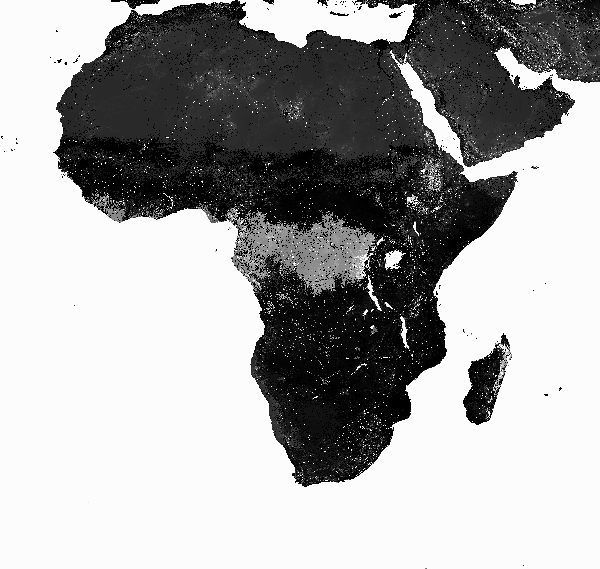

In [11]:
walk_only = Raster("Masterfiles/walking_time_2019_af.tif")
walk_only

# Population Data

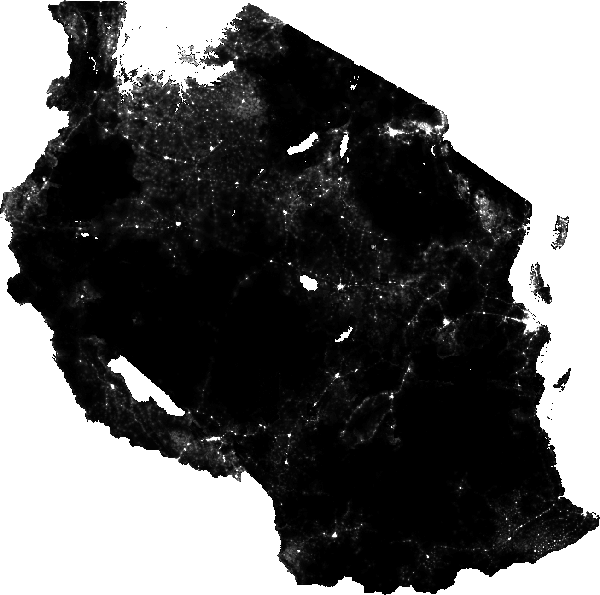

In [12]:
popTZA = Raster("Masterfiles/TZA_F_M_PRIMARY_2020_1km.tif")
popTZA

# Create Isochrone

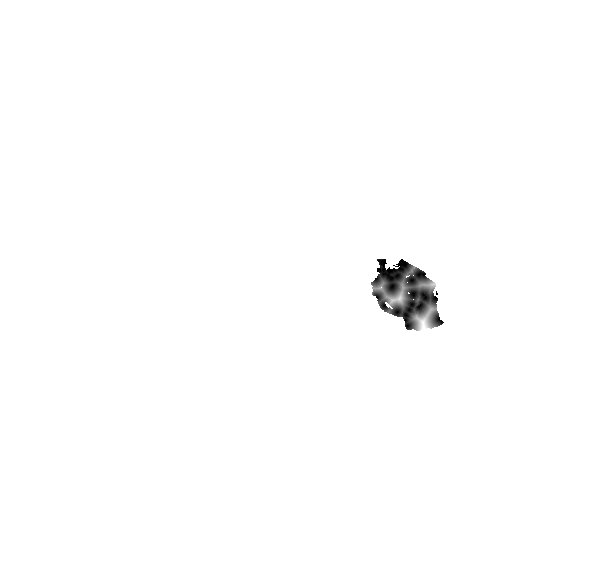

In [13]:
arcpy.env.mask = popTZA
distRaster = DistanceAccumulation(
    in_source_data = schools_loc,
    in_cost_raster = walk_only,
    distance_method = 'GEODESIC'
    )
distRaster

## Bin by Travel Time to create Isochrone

In [14]:
iso_30 =  Con(distRaster <= 30, 30)
iso_60 =  Con((distRaster > 30) &  (distRaster <= 60), 60)
iso_999 =  Con(distRaster > 60, 999)

## Mask Population by Isochrone

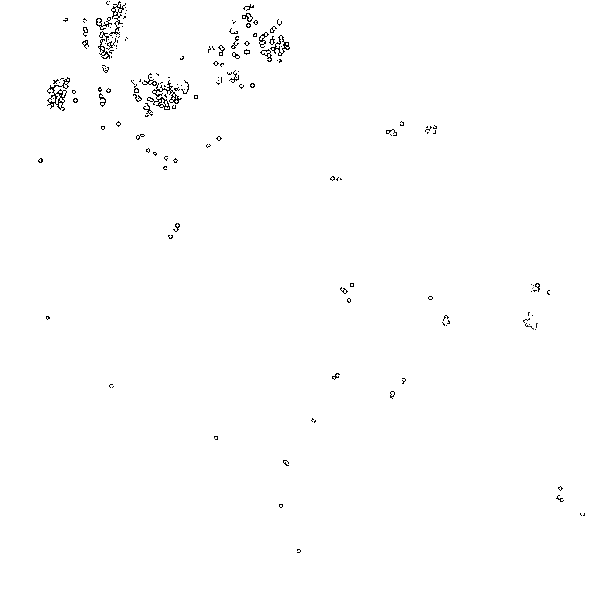

In [15]:
isoPop30 = Con(iso_30, popTZA)
isoPop60 = Con(iso_60, popTZA)
isoPop999 = Con(iso_999, popTZA)
isoPop60

# Zonal Statistics

In [16]:
isoPop30_ZStat = ZonalStatisticsAsTable(in_zone_data = 'temp/gadm_Africa.shp', 
                                 zone_field = 'GID_1',
                                 in_value_raster = isoPop30,
                                 out_table = 'temp/isoPop30TZA',
                                 statistics_type = "SUM",
                                  )
isoPop60_ZStat = ZonalStatisticsAsTable(in_zone_data = 'temp/gadm_Africa.shp', 
                                 zone_field = 'GID_1',
                                 in_value_raster = isoPop60,
                                 out_table = 'temp/isoPop60TZA',
                                 statistics_type = "SUM",
                                  )
isoPop999_ZStat = ZonalStatisticsAsTable(in_zone_data = 'temp/gadm_Africa.shp', 
                                 zone_field = 'GID_1',
                                 in_value_raster = isoPop999,
                                 out_table = 'temp/isoPop999TZA',
                                 statistics_type = "SUM",
                                  )

In [17]:
featureclass = isoPop30_ZStat
field_names = [f.name for f in arcpy.ListFields(featureclass)]
field_names

['Rowid', 'GID_1', 'ZONE-CODE', 'COUNT', 'AREA', 'SUM']

## Join Features

In [18]:
JoinedFeature = gadm_TZA_1

for table in (isoPop30_ZStat, isoPop60_ZStat, isoPop999_ZStat):
    inFeatures = JoinedFeature
    joinField = "GID_1"
    joinTable = table
    fieldList = "SUM"
    arcpy.JoinField_management(inFeatures, joinField, joinTable, joinField, 
                           fieldList)
featureclass = JoinedFeature
field_names = [f.name for f in arcpy.ListFields(featureclass)]
field_names

['FID',
 'Shape',
 'GID_0',
 'NAME_0',
 'GID_1',
 'NAME_1',
 'SUM',
 'SUM_1',
 'SUM_12']

In [19]:
arcpy.conversion.FeatureClassToShapefile(JoinedFeature, "/Output")

<Result 'G:\\Mapping School Locations SAMPLE\\Output'>

In [20]:
# create a ZipFile object
mypath = data_dir + '/Output'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

zip_path = data_dir + '/Output_Compressed/MST_TZA_SHP.zip'
zipObj = ZipFile(zip_path, 'w')
# Add multiple files to the zip
mypath = data_dir + '/Output'
for file in onlyfiles:
    file_path = mypath + '/' + file
    zipObj.write(file_path, basename(file_path))
# close the Zip File
zipObj.close()

# Share to Web

In [22]:
data_path = data_dir + "/Output_Compressed"
shp_path = os.path.join(data_path, "MST_TZA_SHP.zip")
shp_properties={'title':'MST_TZA_Sample',
                'description':'MST_TZA_Sample',
                'tags':'sample'}
thumbnail_path = data_dir + "/Masterfiles/isochrone.png"
web_item = gis.content.add(item_properties=shp_properties, data=shp_path,
                                     thumbnail = thumbnail_path)

<Item title:"MST_TZA_Sample" type:Shapefile owner:sdgs.today>
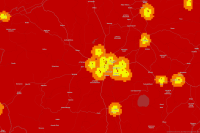

In [23]:
web_item

In [24]:
MST_Sample_item = web_item.publish()

<Item title:"MST_TZA_Sample" type:Feature Layer Collection owner:sdgs.today>
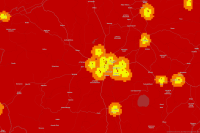

In [25]:
MST_Sample_item